### Import all the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from encodings.aliases import aliases # since the csv file's encoding is unkonwn pandas might not be able to read it so we use aliases


%matplotlib inline 

### Read in the CSV files and remove duplicates 

In [2]:
# to find aliases that work 
# below line creates a set of all available aliases 

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try: 
        df=pd.read_csv("Downloads/crime.csv", nrows=10, encoding=encoding)
        print ('successful', encoding)
    except:
        pass
    

successful mac_iceland
successful cp1250
successful cp1257
successful iso8859_6
successful iso8859_14
successful utf_16_le
successful iso8859_8
successful cp855
successful mac_turkish
successful cp1254
successful cp932
successful iso8859_5
successful mac_roman
successful iso8859_4
successful cp949
successful cp864
successful iso8859_2
successful iso8859_10
successful cp857
successful cp852
successful iso8859_16
successful cp273
successful cp1125
successful cp861
successful utf_16_be
successful cp437
successful hp_roman8
successful cp1252
successful cp1251
successful iso8859_15
successful latin_1
successful cp1140
successful mac_greek
successful cp775
successful cp850
successful koi8_r
successful cp500
successful iso8859_3
successful cp858
successful kz1048
successful cp862
successful iso8859_11
successful cp1258
successful cp1026
successful cp866
successful big5hkscs
successful iso8859_9
successful gbk
successful cp865
successful ptcp154
successful cp863
successful cp1253
successful is

In [3]:
# read in the crime.csv and use the time stamp as datetime index
crime = pd.read_csv("Downloads/crime.csv", encoding="ISO-8859-11")

In [4]:
crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [5]:
crime.shape # to check the shape of the data-- no. of rows and columns 

(319073, 17)

In [6]:
crime.duplicated().sum() # to find the number of the duplicate rows 

np.int64(23)

In [7]:
crime.drop_duplicates(inplace=True) # deletes the duplicate rows, "inplace=True" -- directly modifies the original file

In [8]:
crime.shape # checking the changes 

(319050, 17)

### Exploring the dataset 

In [9]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [10]:
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [11]:
pd.options.display.max_rows=10

In [12]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [13]:
crime.info() # summary info about the dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [14]:
# changing the datatype from 'object' to 'datetime' for : OCCURRED_ON_DATE
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [15]:
crime.info() # checking the changes

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [16]:
crime.describe() # summary info on numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [17]:
crime.describe(include = 'object') # summary information on non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [18]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [19]:
# to find the number of unique values in each column
for col in crime.columns :
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique value(s)")

INCIDENT_NUMBER has 282517 unique value(s)
OFFENSE_CODE has 222 unique value(s)
OFFENSE_CODE_GROUP has 67 unique value(s)
OFFENSE_DESCRIPTION has 244 unique value(s)
DISTRICT has 12 unique value(s)
REPORTING_AREA has 879 unique value(s)
SHOOTING has 1 unique value(s)
OCCURRED_ON_DATE has 233229 unique value(s)
YEAR has 4 unique value(s)
MONTH has 12 unique value(s)
DAY_OF_WEEK has 7 unique value(s)
HOUR has 24 unique value(s)
UCR_PART has 4 unique value(s)
STREET has 4657 unique value(s)
Lat has 18178 unique value(s)
Long has 18178 unique value(s)
Location has 18194 unique value(s)


### Answering some Questions - 

1. What are the most common crimes in terms of offence groups?

In [20]:
crime.OFFENSE_CODE_GROUP.value_counts()[:10]

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

In [21]:
crime.shape[0]

319050

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    11.638301
Larceny                             8.128820
Medical Assistance                  7.378154
Investigate Person                  5.876508
Other                               5.664629
Drug Violation                      5.185708
Simple Assault                      4.960351
Vandalism                           4.831218
Verbal Disputes                     4.105626
Towed                               3.537690
Name: count, dtype: float64

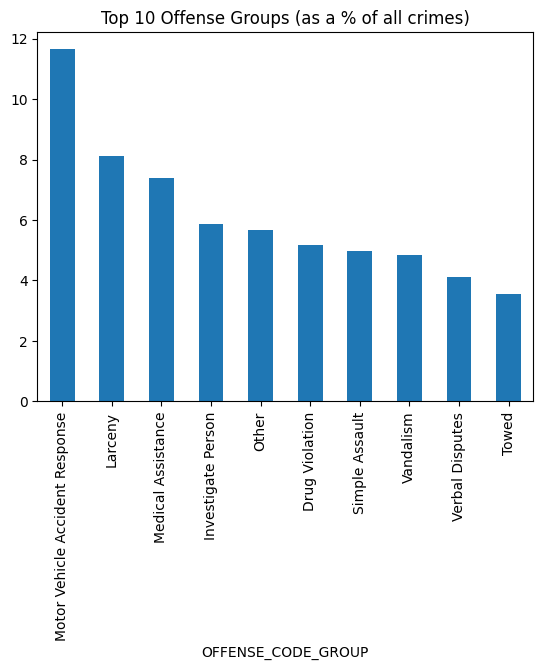

In [22]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display((offense_group_vals / crime.shape[0])*100)

# creating a bar chart: for top 10 offense groups
((offense_group_vals / crime.shape[0])*100).plot(kind = 'bar');
plt.title("Top 10 Offense Groups (as a % of all crimes)");


2. What are the least common offense groups?

In [23]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

OFFENSE_CODE_GROUP
Burglary - No Property Taken                 0.000627
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    0.000627
Biological Threat                            0.000627
INVESTIGATE PERSON                           0.001254
HUMAN TRAFFICKING                            0.002194
Gambling                                     0.002507
Manslaughter                                 0.002507
Explosives                                   0.008463
Phone Call Complaints                        0.009716
Aircraft                                     0.011283
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 least common crimes (as a % of total crimes)')

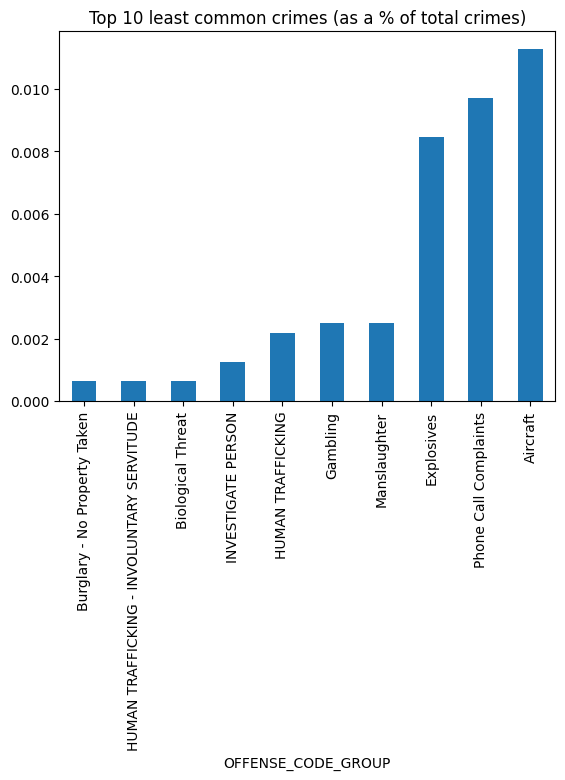

In [24]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

display((offense_group_vals / crime.shape[0])*100)

((offense_group_vals / crime.shape[0])*100).plot(kind='bar')
plt.title("Top 10 least common crimes (as a % of total crimes)")

3. In which year were the most number of crimes commited?
   

In [25]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes')

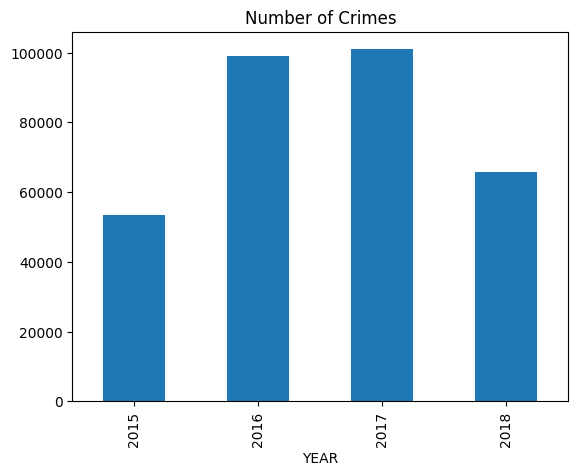

In [26]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind = 'bar');
plt.title("Number of Crimes")

4. Are there more crimes committed on a specific days ?

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Days with most crimes committed')

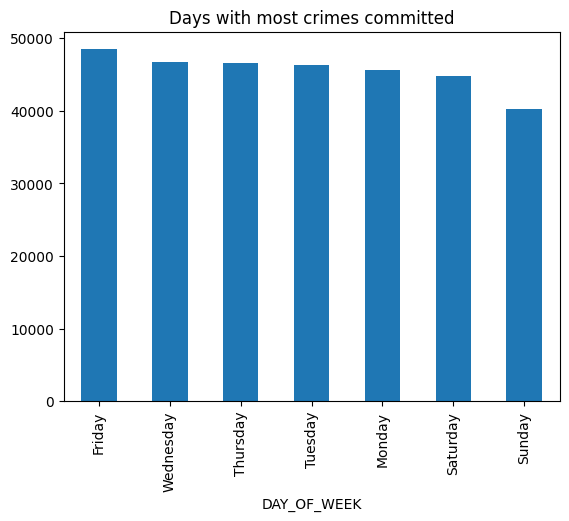

In [27]:
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False));
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar')
plt.title("Days with most crimes committed")

5. Are there more crimes committed during specific hours?

HOUR
0     15106
1      9267
2      7693
3      4589
4      3408
      ...  
19    17587
20    15849
21    14109
22    12925
23    10596
Name: INCIDENT_NUMBER, Length: 24, dtype: int64

Text(0.5, 1.0, 'Hours with most crime incidents')

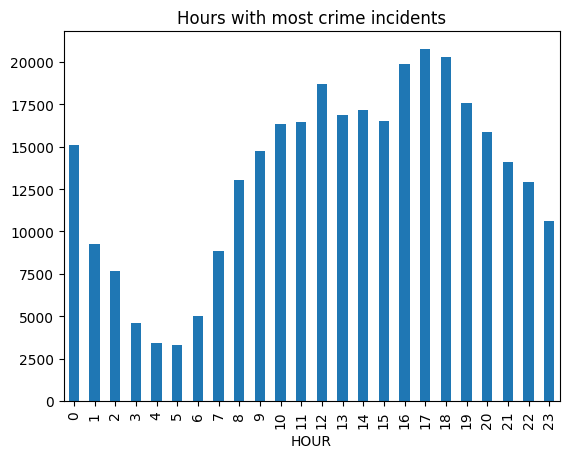

In [28]:
display(crime.groupby('HOUR').count()['INCIDENT_NUMBER']);
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title("Hours with most crime incidents")

6. On what days and during which hours are the most crimes committed?


In [29]:
week_and_hour = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [30]:
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

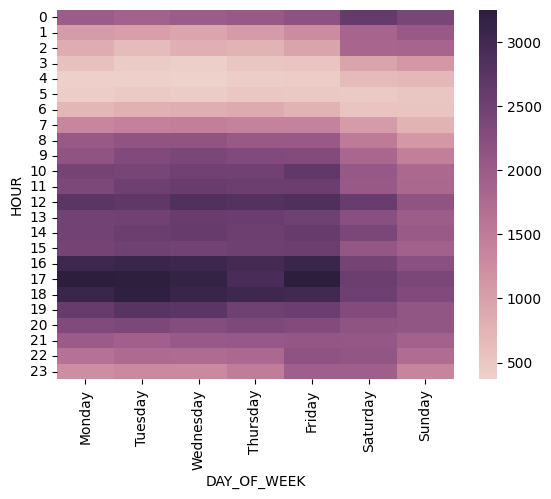

In [31]:
sns.heatmap(week_and_hour, cmap = sns.cubehelix_palette(as_cmap=True))

7. In which months were the number of crimes comitted below average? And in which months on average did most crimes occur?

In [32]:
# if the value is less than the average crime committed then highlight the value in blue
avg_crime = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crime is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props = ''):
    return props if v < avg_crime else None
s2 = year_and_month.style.map(style_negative, props = 'color:blue;').map(lambda v : 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crime is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [33]:
# highlight the maximum values using the darkgreen colour 

In [34]:
def highlight_max(s, props = ''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color: white; background-color: darkgreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


8. In which districts were the most crimes committed on a yearly basis?

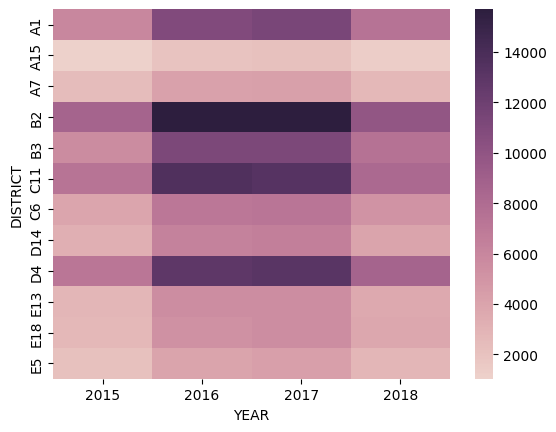

In [35]:
district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_and_year, cmap = sns.cubehelix_palette(as_cmap=True));

In [36]:
# if the value is less than the average crime per district per year, highlight the value in blue

avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.map(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

# Highlight the maximum value in each colummn with darkgreen
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

The average crime per district per year is: 6610.104166666667


/var/folders/c1/v6stdzs11tv5cy5_m93mj9v80000gn/T/ipykernel_34705/1508617841.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
